<p align="center">
    <img src="img/cesi.png">
</p>

# Bloc Algorithmique avancée

* *Hugo ANTOINE*
* *Adrien NICOLAS*
* *Valentin AVELANGE*
* *Sofian TERRAB*

## Sommaire

- [Contextualisation](#contextualisation)

- [Objectifs](#objectifs)

- [Contraintes](#contraintes)

- [Analyse](#analyse)

- [Modelisation](#modelisation)

- [Démonstration algorithmique np-complet](#démonstration-algorithmique-np-complet)

- [Conclusion](#conclusion)

- [Bibliographie](#bibliographie)


## Contextualisation

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de **nouvelles solutions de mobilité** pour les personnes et les marchandises adaptées à différents types de territoires.

Votre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, vous avez réalisé **plusieurs études sur le thème de la Mobilité Multimodale Intelligente.** Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

## Objectifs

L'étude est orientée sur la **gestion de tournées de livraison.** Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du **trafic prévu sur chaque axe** pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour **générer une tournée de livraison correspondant à ce problème.**

## Contraintes

Voici une liste de l'ensemble des contraintes qui pourraient être intégrées au périmètre de l'étude :

* Fenêtre de temps de livraison pour chaque objet

    * Interdiction de livrer hors de la fenêtre
    * Possibilité d'attendre sur place l'ouverture de la fenêtre temporelle

* k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base.

    * Capacité des camions (2 ou 3 dimensions) et encombrement des objets
    * Certains objets ne peuvent être livrés que par certains camions

* Chaque objet a un point de collecte spécifique

* Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic

**La contrainte supplémentaire selectionnée pour notre problème sera le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), représentant la variation du trafic. L'algorithme pourra s'auto-adapter à cette variation, et proposer un chemin le plus court possible pour atteindre la destination en prenant en compte le trafic. Les arêtes ne seront alors plus pondérées par une distance, mais par un temps de parcours.**


## Analyse

Comme mentionné précédemment, l'idée est de proposer un algorithme, pour répondre au problème de la tournée sur un réseau routier reliant un sous-ensemble de ville tout en revenant au point de départ.
L'idée est donc de minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

Ce problème peut s'apparenter à un problème déjà résolu : le voyageur de commerce. Il s'agit d'un problème d'optimisation qui consiste à déterminer, étant donné une liste de villes et les distances entre toutes les paires de villes, le plus court circuit qui passe par chaque ville une et une seule fois.



<p align="center">
    <img src="img/map.png">
</p>

Ainsi, étant donné n points (des villes donc) ainsi que les distances associées, séparant chaque point, on cherche le chemin de longueur minimale passant exactement par chaque point et revenant au point de départ (ce qui s'apparente à un cycle).


D'une manière formelle, l'expression de l'instance de notre graphe est donc :
	
* ***G** = (**V**, **E**, **$\alpha$**)* avec **V** un ensemble de sommets, **E** un ensemble d'arêtes et **$\alpha$** une fonction de coût sur les arcs. Le problème est de trouver le plus court cycle hamiltonien dans le graphe G.

Le problème de l'existence d'un circuit est NP-complet pour les circuits Hamiltoniens.
Pour le problème du plus court de parcours, des algorithmes
spécifiques peuvent être proposés quand il s'agit d'une distance L1, L2 ou L , (par exemple, en procédant à
**une triangulation de Delaunay de l'espace géographique sous-jacent**). 

Enfin, ce problème du voyageur peut être envisagé avec des contraintes supplémentaires. Les plus
courantes viennent du domaine du transport et sont liées soit à une formulation temporelle, soit à des
problèmes de capacité. Dans notre cas, et pour être le plus simple, nous allons ajouter la contrainte représentant la variation du trafic, faisant varier les poids d'arêtes en particuliers.


## Modelisation

Le problème du voyageur de commerce est un problème d'optimisation qui consiste à déterminer le plus court circuit qui passe par chaque point (relié par des arêtes) une seule fois en revenant au point de départ (dans la plupart du temps, les "points" sont des villes). Le but, trouver un circuit de poids minimal qui passe part toutes les étapes une seule fois exactement. Hélas, on ne connaît pas d'algo nous permettant de trouver une solution exacte rapidement dans tous les cas. Le problème du voyageur de commerce est un problème NP-Complet.

Dans cette partie, on va voir comment résoudre notre problème en expliquant point par point le problème du voyageur de commerce. 
On a donc modélisé notre problème (c'est à dire traduire ce dernier) sous différents points.

Problème du voyageur de commerce:   
* **Graphe non orienté complet avec poids entiers positifs sur chaque arrête et un entier k (positif).**   
* **Dans un graphe complet -> arrête(n-1) entre chaque paire de sommet (n)**   
* **Savoir si le graphe présente un circuit qui passe par tous les sommets et dont le poids totale est < à k**   
* **Montrer que probleme est NP-difficile avec réduction à partir du problème de circuit hamiltonien**   
* **Construction d'un graphe complet G' avec même sommets que G -> fixer le poids de l'arête (u,v) à 0 si (u,v) est une arête de G. A 1 si l'arête (u,v) n'existe pas dans G. Fixer k = 0.**   
* **Réduction -> se fait en un temps polynomial fonction de la taille de G, car elle ajoute au plus n(n-1) sommets.**   
* **Prouver que la réduction fonctionne -> montrer que G possède un circtui hamiltonien si et seulement si G' comprend un circuit de poids 0 qui passe par tous les sommet**


### Démonstration algorithmique np-complet

* La premiere etape est de poser notre **problème d'optimisation** et de **décision** lié au probleme de base : 

    * Problème d'optimisation (P1) :

        *  Données : ***G** = (**V**, **E**, **$\alpha$**)* avec **V** un ensemble de sommets, **E** un ensemble d'arêtes et **$\alpha$** une fonction de coût sur les arcs et v $\in$ V.
        *  Question : **Quel est le cylce hamiltonien le plus court partant de de v** 

    * Problème de réduction :

        *  Données : ***G** = (**V**, **E**, **$\alpha$**)* avec **V** un ensemble de sommets, **E** un ensemble d'arêtes et **$\alpha$** une fonction de coût sur les arcs et v $\in$ V et k $\in$ Z.
        *  Question : **Existe t-il un cycle hamiltonien dont la longueur est $\le$ k**
     
<p align="center">
    <img src="img/graph.png" width="50%">
</p>

### Démarche scientifique 

On cherche à determiner quel est la compléxité du problème  permettant de trouver le cycle hamiltonien le plus court partant de v dans le graphe **G**.

On sait que la compléxité du problème permettant de determiner le cycle hamiltonien le plus court partant de v dans le graphe complet pondéré **P2** est np-complet

On va donc réduire le probleme **(P1)** au problème **(P2)**

On choisit une instance **I1** de notre probleme **(P1)**

On va reduire l'instance **I1** à une instance **I2** de notre probleme **(P2)** 


* Pour ce faire, on va utiliser l'algo suivant :

```
        Pour chaque cellules de la matrice :
            Si pas de liaison (hors diagonal):
                On cherche le chemin le plus court entre les deux sommets (algo D)
                On pondère cette arrête avec la distance obtenue
                On stocke le plus court chemin obtenu
```

* Parcours de la matrice : **n<sup>2</sup> <br/>**
* Algorithme D : **nlog(n)** <br/>
* Ponderation d'une arrête (écriture en mémoire) : **1** <br/>
* Stockage du chemin le plus court obtenu (écriture en mémoire) : **1** <br/>
* ***n<sup>2</sup> (nlog(n) + 1 + 1) $\to$ n<sup>3</sup>logn $\to$ polynomial***

            
**I1** est reductible à **I2** en temps polynomial. Donc **P1** est au moins aussi difficile que **P2** : **P1** $\ge$ **P2** : 
* **P1** est donc **NP-difficile**

### Algorithme de certification :

En informatique théorique, plus précisément en théorie de la complexité des algorithmes, un certificat est, de façon simplifiée, une information permettant de certifier que l'entrée est correcte.
En particulier un problème de décision est dans la classe NP s'il existe pour chaque donnée ayant une réponse positive un certificat polynomial, c'est-à-dire s'il existe pour chaque donnée pour laquelle la réponse est « oui », un certificat de longueur polynomiale en la taille de la donnée, tel que la vérification de la réponse pour la donnée munie de son certificat se réalise en temps polynomial

```
    On vérifie si un cycle du graphe est existant, c’est-à-dire s’il existe dans l'instance une arête entre chaque paire de sommets successifs du graphe
    On parcourt le graphe pour vérifier que chaque sommet de l'instance n'y apparit qu'une seule fois
    On calcule la longueur du circuit et on verifie si la longueur est inferieure à k 
    On verifie si le début et l'arrivée sont les memes

```

### 



## Conclusion

Pour conclure, grace aux rcherches effectuées, nous avons pu realiser une esquisse de la modelisation de notre probleme en proposant une reduction du probleme à un autre. De ce fait, les propriétés théoriques, notamment de complexité ont pu etre abordés pour notre cas.

La conclusion generale de notre probleme d'apres la demonstration est que le problème du voyageur de commerce est NP-complet.


## Bibliographie

source **Analyse** : http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf

source **Modelisation** : https://univ.scholarvox.com/catalog/book/docid/88817457?searchterm=algorithmes

source **Modelisation** : http://adrien.cazaban.free.fr/files/OptiCombi_PVC_RapportEtComparatifs.pdf.

source **Modelisation** / **Algorithme de certification**: https://fr.wikipedia.org/wiki/Certificat_(complexit%C3%A9)


# Contexte Livrable finale

Notre problème est le suivant, nous devons determiner le chemin le plus court entre plusieurs villes pour qu'un camion de livraison puisse parcourir toute ces villes en le moins de temps possible et ainsi livrer tous les colis.

Nous avons à notre disposition une liste de villes et parmis ces villes nous devons en séléctionner quelques unes et determiner le cycle de plus court pour passer par toute ces villes et revenir au point de depart.
<br>
Nous avons aussi décider d'ajouter une contrainte qui est que pour certaines villes, le camion n'aura le droit de livrer des colis que dans une fenêtre horaires bien précise.

Ici, pour modeliser notre problème, nous allons devoir modéliser les differente elements de la façon suivante :

- Le graph de toutes les villes : une matrice d'adjacence
- Le graph complet de toutes les villes choisis : une matrice d'adjacence
- La liste de toute les villes choisis : un tuple des indexs des sommets dans le graph de toutes les villes
- Un sommet de depart : un index dans la liste de toute les villes
- Un sommet de passge avec intervalle : un index dans la liste de toute les villes choisis
- Un intervalle de temps : un tuple


# Modélisation linéaire


### Variables de décision du programme

$\forall$ $i \in {\{1,2,\ldots,n\}}$, $\forall$ $j \in {\{1,2,\ldots,n\}}$, $X_{i,j} \in {\{0;1}\}^{n^2}$, $P_{i,j} \in {\mathbb{R}_{+}^{*n^{2}}}$
$X_{i,j}$  : Chemin parcouru </br>
$P_{i,j}$ : Poids des arêtes</br>


### Contraintes du programme

C1 : $ (\sum_{j=1}^{n} X_{i,j} = 1)$  Somme des entrant </br>
</br>
C2 : $ (\sum_{i=1}^{n} X_{i,j} = 1)$  Somme des sortant </br>
</br>

C3 : $ (\sum_{i=1}^{n} X_{i,i} = 0)$  Somme de la liaison identique (X_0_0) </br>
</br>

C4 : Depuis un certain chemin referençant le cycle le plus court : $[0,1,\ldots,0]$, la distance de l'un de ses sommets contenus doit être compris dans L'intervalle de temps $[0,n]$ avec $n \in \mathbb{R}_{+}$


###  Fonction économique

Min Z = $ \sum_{i=1}^{n}\sum_{j=1}^{n} X_{i,j}(P_{i,j}+T_{i,j}) $




## Implémentation de la fonction linéaire 


Premierement, on definit deux fonctions qui vont nous permettre de visualiser comment se comporte notre simplexe, et ce que ceui -ci va nous retoruner. De ce fait, une fonction permerttra de'afficher un graph particulier en fonction *plot_graph* de son nombre de sommet et de son chemin renvoyé par le simplexe.


La seonde fonction va nous permettre d'obtenir la chemin complet de notre graphe en prenant en compte le graphe non complet complet generé precedemment.


In [53]:
def plot_graph(path, graph, all_vertex, all_verticies, start_vertex):
  for i in range(len(graph) - 1):
    for j in range(i + 1, len(graph)):
      if graph[i, j] != np.inf:
        x = [all_vertex[i][0], all_vertex[j][0]]
        y = [all_vertex[i][1], all_vertex[j][1]]
        plt.plot(x, y, color = "gray")
  for i in range(len(path) - 1):
    x = [all_vertex[path[i]][0], all_vertex[path[i+1]][0]]
    y = [all_vertex[path[i]][1], all_vertex[path[i+1]][1]]
    plt.plot(x, y, color = "red")
  for i in range(len(all_vertex)):
    if(i == start_vertex):
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "blue")
    elif(i in all_verticies):
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "green")
    else: 
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "gray")
    plt.text(all_vertex[i][0] - 10, all_vertex[i][1] + 20, str(i))
  plt.show()

def get_complete_path(path, all_paths):
  complete_path = []
  for i in range(len(path) - 1):
    complete_path.extend(all_paths[(path[i], path[i+1])][:-1])
    if i == len(path) - 2:
      complete_path.append(all_paths[(path[i], path[i+1])][-1])
  return complete_path

Pour ce qui est de la génération de l'instance, un fichier ipynb *generate_matrix_ziozi* permet de generer des fichier sous le format pickle, correspondant à un objet python. Cet objet va nous renvoyer un graph, ainsi que son graph compelt associé. On aura aussi l'ensemble des caracteristiques concernant ces instances ci (tout est paramettrable dans le fichiers, dont le nombre de villes à selectinné, et l'ordre du graph non complet de base).

In [54]:
import pickle
with open("../code/data_small.pickle", "rb") as file:
  data = pickle.load(file)


graph = data["graph"]
complete_graph = data["complete_graph"]
all_paths = data["all_paths"]
vertices_list = data["vertices_list"]
start_vertex = data["start_vertex"]
start_vertex_index = data["start_vertex_index"]
interval_vertex = data["interval_vertex"]
interval_vertex_index = data["interval_vertex_index"]
interval = data["interval"]
all_vertex = data["all_vertex"]



Enfin, voici notre Simplexe, celui va prendre en compte l'ensemble de nos variables de decisions, les contraintes, et la fonction économique. Il va nous permettre d'avoir la reponse exacte du chemin le plus court au sein de nos instances, et de definir ainsi dans notre cas, la borne inferieure de la fonction économique.

-----------------
-----------------
1 Optimal 8069.028728027086
route_plan [[(0, 5), (5, 27), (27, 33), (33, 13), (13, 4), (4, 32), (32, 25), (25, 14), (14, 41), (41, 8), (8, 49), (49, 21), (21, 23), (23, 42), (42, 20), (20, 28), (28, 22), (22, 15), (15, 7), (7, 30), (30, 40), (40, 35), (35, 9), (9, 31), (31, 45), (45, 18), (18, 37), (37, 29), (29, 44), (44, 26), (26, 17), (17, 3), (3, 36), (36, 38), (38, 1), (1, 34), (34, 19), (19, 48), (48, 11), (11, 2), (2, 46), (46, 10), (10, 12), (12, 6), (6, 43), (43, 39), (39, 16), (16, 24), (24, 47), (47, 0)]]
liste_route_plan [0, 5, 27, 33, 13, 4, 32, 25, 14, 41, 8, 49, 21, 23, 42, 20, 28, 22, 15, 7, 30, 40, 35, 9, 31, 45, 18, 37, 29, 44, 26, 17, 3, 36, 38, 1, 34, 19, 48, 11, 2, 46, 10, 12, 6, 43, 39, 16, 24, 47, 0]
no. of times LP model is solved =  12
subtour log (no. of subtours in each solution)) [11, 11, 5, 3, 2, 2, 2, 2, 3, 3, 3, 1]
Time taken by DFJ formulation =  14.59171438217163


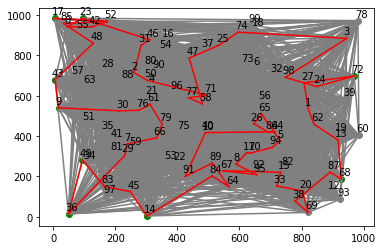

In [55]:
#import libraries
%matplotlib inline
import pulp
import pandas as pd
from matplotlib import pyplot as plt
import time
import copy
import numpy as np


# this function find all the subtour in the LP solution.
def get_plan(r0):
    r=copy.copy(r0)
    route = []
    while len(r) != 0:
        plan = [r[0]]
        del (r[0])
        l = 0
        while len(plan) > l:
            l = len(plan)
            for i, j in enumerate(r):
                if plan[-1][1] == j[0]:
                    plan.append(j)
                    del (r[i])
        route.append(plan)
    return(route)


def Simplex(complete_graph):

    no_of_locs = len(complete_graph)


    dis_mat= complete_graph

    start_t_1=time.time()
    model=pulp.LpProblem('tsp',pulp.LpMinimize)
    #define variable
    x=pulp.LpVariable.dicts("x",((i,j) for i in range(no_of_locs) \
                                    for j in range(no_of_locs)),\
                            cat='Binary')
    #set objective
    model+=pulp.lpSum(dis_mat[i][j]* x[i,j] for i in range(no_of_locs) \
                        for j in range(no_of_locs))
    # st constraints
    for i in range(no_of_locs):
        model+=x[i,i]==0
        model+=pulp.lpSum(x[i,j] for j in range(no_of_locs))==1
        model += pulp.lpSum(x[j, i] for j in range(no_of_locs)) == 1
        
        
    status=model.solve()



    route=[(i,j) for i in range(no_of_locs) \
            for j in range(no_of_locs) if pulp.value(x[i,j])==1]
    route_plan=get_plan(route)
    subtour=[]

    while len(route_plan)!=1:
        for i in range(len(route_plan)):
            model+=pulp.lpSum(x[route_plan[i][j][0],route_plan[i][j][1]]\
                                for j in range(len(route_plan[i])))<=\
                                len(route_plan[i])-1


        status=model.solve()
        route = [(i, j) for i in range(no_of_locs) \
                    for j in range(no_of_locs) if pulp.value(x[i, j]) == 1]
        route_plan = get_plan(route)
        
        subtour.append(len(route_plan))

    print("-----------------")
    print(status,pulp.LpStatus[status],pulp.value(model.objective))
    print("route_plan",route_plan)

    out = [item for t in route_plan[0] for item in t]
    liste_out = list(dict.fromkeys(out))
    liste_out.insert(len(liste_out), liste_out[0])
    print("liste_route_plan",liste_out)
    


    print("no. of times LP model is solved = ",len(subtour))
    print("subtour log (no. of subtours in each solution))",subtour)
    print("Time taken by DFJ formulation = ", time.time()-start_t_1)

    return liste_out,pulp.value(model.objective)

print("-----------------")
liste_out,distance_obj = Simplex(complete_graph)
"""while is_path_in_interval(liste_out, complete_graph, interval, interval_vertex_index) != True:
        print("path is not in interval")
        liste_out,distance_obj = Simplex(complete_graph)"""

complete_path = get_complete_path(liste_out, all_paths)
plot_graph(complete_path, graph, all_vertex, vertices_list, start_vertex)




Le graph d'arriere plan est donc notre graph generé precedemment, et de ce graphe, nous avons selectionné un certains nombres de villes, pour pouvoir y trouver le plus court chemin passant par celles-ci. D'apres notre smplexe, le temps minimal (ou la distance) de ce chemin est donner, ainsi que la route precise (representé par le graphique ci-dessus).

## Méthode méta-heuristiques

Une métaheuristique est un algorithme d’optimisation visant à résoudre des problèmes d’optimisation difficile (souvent issus des domaines de la recherche opérationnelle, de l'ingénierie ou de l'intelligence artificielle) pour lesquels on ne connaît pas de méthode classique plus efficace.

Le principe ? effectuer la meme operation qu'une methode simplexe, mais avec des parametres differents, et des instances bien plus importants.
De ce fait, nous avons implémenté et testé plusieurs methode meta heuristiques pour les comparer, verifier le resultats de sortie, et voir quelles sont les meilleures ainsi que les plus optimisées.

### Méthode de recherche tabou 

La recherche tabou est une métaheuristique d'optimisation qualifée de recherche locale utilisée pour résoudre des problèmes complexes et/ou de très grande taille. 

Elle consiste, à partir d'une solution, que l'on appele solution courante, une exploration d'autres solutions en appliquant un opérateur de voisinage. La sélection d'une solution à partir de la solution courante doit être la meilleure parmi son voisinage. A chaque choix d'une solution parmi un voisinage, la solution choisie est stockées dans une liste Tabou. Cette liste contient donc un certain nombre de solutions choisies précédemment. 
Le temps que la solution reste dans la liste dépend de la longueur maximale de cette liste, que l’on aura fixée au préalable. À chaque sélection, la nouvelle solution choisie ne doit pas appartenir à cette liste Tabou.

Contrairement à une simple descente locale, la solution sélectionnée peut être de moins bonne qualité que la solution courante, ce qui permet d’éviter d’être rapidement bloqué sur une solution et de continuer à en explorer d’autres.

Après un certain nombre d’itérations, la meilleure solution trouvée, parmi toutes celles qui ont été explorées, est retournée par l’algorithme. Le nombre d’itérations maximal doit lui aussi être défini préalablement. (nb iter 2 fois plus grand que taille tabou).


In [136]:
from collections import deque


def generate_random_path(nb_vertex, start_vertex):
  path = np.arange(nb_vertex)
  path = np.delete(path, np.where(path == start_vertex))
  np.random.shuffle(path)
  path = np.append(path, start_vertex)
  path = np.insert(path, 0, start_vertex)
  return path

def distance_tot(matrice,path_matrix):
    distance_tot = 0
    ind = 2
    points = [0,0]
    for i in range(len(path_matrix)):
        if i == 0:
            points = path_matrix[0:2]
            distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
        else:
            if (ind <= len(matrice)):
                points = path_matrix[ind-1:ind+1]
                distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
                ind += 1
    return distance_tot

tab_distance = []

def recherche_tabou(complete_graph, solution_initiale, taille_tabou, iter_max, interval):
    """
    1. On part d'un élément de notre ensemble de recherche qu'on déclare élément courant
    2. On considère le voisinage de l'element courant et on choisit le  meilleur d'entre
       eux comme nouvel element courant, parmi ceux absents de la liste tabou, et on l'ajoute
       a la liste tabou
    3. On boucle jusqu'a condition de sortie.
    """
    nb_iter = 0                                                                
    liste_tabou = deque((), maxlen = taille_tabou)                             
                                                                               
    # variables solutions pour la recherche du voisin optimal non tabou         
    solution_courante = solution_initiale                                       
    meilleure = solution_initiale                                               
    meilleure_globale = solution_initiale                                       
                                                                                
    # variables valeurs pour la recherche du voisin optimal non tabou           
    valeur_meilleure = distance_tot(complete_graph, solution_initiale)  
                          
    valeur_meilleure_globale = valeur_meilleure                                 
                                                                                
    while (nb_iter < iter_max):
        valeur_meilleure = -1                                                   
                                                                                
        # on parcourt tous les voisins de la solution courante                  
        for voisin in generate_neighbours(solution_initiale, complete_graph, interval, 0):          
                                       
            valeur_voisin=distance_tot(complete_graph, voisin)                                
        
                                                                                
            # MaJ meilleure solution non taboue trouvée                         
            if valeur_voisin > valeur_meilleure and tuple(voisin) in liste_tabou:  
                    valeur_meilleure = valeur_voisin                                
                    meilleure = voisin                                              
                                                                                
        # on met à jour la meilleure solution rencontrée depuis le début        
        if valeur_meilleure > valeur_meilleure_globale:                         
            meilleure_globale = meilleure                                       
            valeur_meilleure_globale = valeur_meilleure                         
            nb_iter = 0                                                         
        else:                                                                   
            nb_iter += 1                                                        
                                                                                
        # on passe au meilleur voisin non tabou trouvé                          
        solution_courante = meilleure                                           
                                                                                
        # on met à jour la liste tabou                                          
        liste_tabou.append(tuple(solution_courante))     
                                   
                                                                                
    return meilleure_globale                                                

26438.160366489974


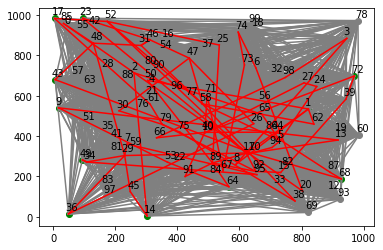

In [138]:
taille_tabou = 5
solution_initiale = generate_random_path(len(complete_graph), 0)
iter_max = 30
interval = (0,1000)

sol = recherche_tabou(complete_graph, solution_initiale, taille_tabou, iter_max, interval)
print(distance_tot(complete_graph,sol))


complete_path = get_complete_path(sol, all_paths)
plot_graph(complete_path, graph, all_vertex, vertices_list, start_vertex)

Les deux parametres changeables de la méthode sont le nombre d'iterations, ainsi que la taille de la liste tabou. On y observe ainsi un resultat montrant un chemin assez brouillon. Pour pouvoir avoir un meilleur resultat, il faut chnager le nombre d'itérations, et aussi changer la taille de la liste tabou pour troiver le bon compromis, ainsi que le nombre de fois où on lance l'algoritthme (le multi start).

IntProgress(value=0, layout=Layout(width='100%'), max=50)

22461.568687026724


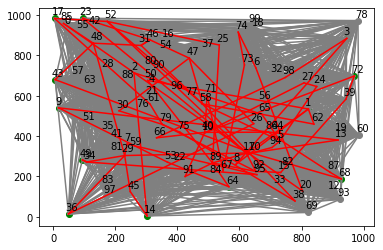

In [140]:
# Make a multistart of taboo_research
distance_tab_multi=[]
nb_start = 50
bar = IntProgress(min=0, max=nb_start, layout={"width" : "100%"})
display(bar)
bornes = []
for _ in range (nb_start):  

    path = generate_random_path(len(vertices_list), start_vertex_index)
    sol = recherche_tabou(complete_graph, solution_initiale, taille_tabou, iter_max, interval)
    dist_sol = distance_tot(complete_graph,sol)
    solution_mult = sol
    if dist_sol < distance:
        solution_mult = sol
        distance = dist_sol
        i_tab = i_tab
        T_tab = T_tab
    
    bar.value += 1
bar.close()
print(distance)

complete_path = get_complete_path(solution_mult, all_paths)
plot_graph(complete_path, graph, all_vertex, vertices_list, start_vertex)

Grace au multi start, on observe ainsi une nette optimisation du chemin ainsi que a distance de celui ci. Cea est dur en partie grace au multi start, car l'algorithme va chercher des minimums locaux pour ainsi les comparer, et y trouver le meilleur au global.

### Méthode du recuit simulé

Le recuit simulé ("simulated annealing") est un algorithme itératif qui apporte une solution au problème de l'attraction par les optimums locaux. Une solution voisine meilleure que la solution actuelle sera toujours acceptée. Une solution voisine moins bonne que la solution actuelle sera parfois acceptée selon la probabilité :
${T = temp * exp ^{(-i/tau)}}$


![image info](../Livrables/img/Hill_Climbing_with_Simulated_Annealing.gif)


Finalement, le principe global consiste à générer successivement des configurations à partir d'une solution initiale S0 et d'une température initiale T0 qui diminuera tout au long du processus jusqu'à atteindre une température finale ou un état d’équilibre (optimum global).

Les fonction ci-dessous vont alimenter le fonctionnement generale de l'algorithme du recuit simulé. le recuit simulé va demander 4 grands parametres : la matrice complete, une solution initial (generé aleatoirement, et sous la forme d'un chemin partant d'un point, et finissant par ce meme point). une temperature maximum (ce parametre est sujet à changement, et on verra ce qui changera dans les solutions obtenues), et un tableau de voisin au chemin que nous avns generé aleatoirement ( ces voisins sont sujets à la contrainte de Fenêtre de temps de livraison , c'est à dire qu'un point dans le chemin devra respecter un temps de livraison contenu dans un certain interval généré). 

In [122]:
def generate_neighbours(path, complete_graph, interval, vertex):
  neighbours = []
  for i in range(len(path)):
    for j in range(i + 1, len(path)-1):
      new_neighbour = path.copy()

      new_neighbour[i] = path[j] 
      new_neighbour[j] = path[i]
      
      if is_path_in_interval(new_neighbour, complete_graph, interval, vertex) and new_neighbour[0] == new_neighbour[-1]:
        neighbours.append(new_neighbour)
  return neighbours


def get_distance_between_nodes(graph, i, j):
  if (graph[i][j] != np.inf):
    return graph[i][j], [i, j]
  else:
    if i != j:
      shortest_path = find_path(graph, i,j)
      return shortest_path.total_cost, shortest_path.nodes
    else:
      return 0, None


def is_path_in_interval(path, complete_graph, interval, vertex):
  weight = 0
  for i in range(np.where(np.array(path) == vertex)[0][0]):
    weight += complete_graph[path[i]][path[i+1]]
  if weight >= interval[0] and weight <= interval[1]:
    return True
  else:
    return False


La definitions des parametres se fait ici, on definit ainsi la temperature initial du recuit simulé, la temperature minimale à atteindre, le nombre d'iterations et le tau (Pour la loi de refroidissement). On genere aussi un chemin aleatoire pour la solution initiale ainsi que ses voisins associés.

In [104]:
bornes = []
bone_inf = distance_obj
nb_iterations=10000 #Dans la boucle while de la boucle principale
T0 = 2000 #Température de départ
Tmin = 1e-2 #Température minimale
tau = 1e4 #Pour la loi de refroidissement

path = generate_random_path(len(vertices_list), start_vertex_index)
neighbours = generate_neighbours(path, complete_graph, interval, interval_vertex_index)

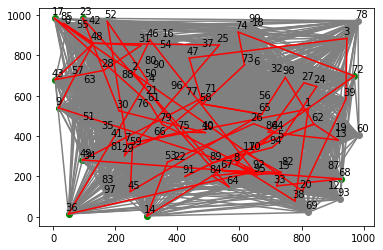

distance :  23283.863650691317


In [109]:
import random
import numpy as np
import networkx as nx 
from dijkstar import Graph, find_path
from ipywidgets import IntProgress 
from IPython.display import display
from matplotlib import pyplot 


def recuit_simule_matrix(matrix,path,temp):
    i_tab = []
    T_Tab = []
    distance_tab = []

    distance = distance_tot(matrix,path)
    solution = np.copy(path)
    i = 0
    T=temp

    while T>Tmin and i<nb_iterations:
        i_tab.append(i)
        T_Tab.append(T)
        distance_tab.append(distance)
        i+=1

        #Loi de refroidissement
        T = temp * np.exp(-i/tau)

        solution_voisine = neighbours[np.random.randint(0, len(neighbours))]
        """while is_path_in_interval(solution_voisine, matrix, interval, 95) == False:
            solution_voisine = neighbours[np.random.randint(0, len(neighbours))]"""

        #Création de la nouvelle solution proche de la precedente
        

        #Comparaison des deux valeurs
        difference = distance_tot(matrix,solution) - distance_tot(matrix,solution_voisine)

        # Si la nouvelle solution est meilleure, on la prend
        if difference > 0:
            solution = solution_voisine
            distance = distance_tot(matrix,solution_voisine)
        # Sinon, on prend la solution actuelle
        else:
            if np.random.uniform() > np.exp(-difference/T): #on accepte la solution avec une certaine probabilité. 
                solution=solution_voisine
                distance=distance_tot(matrix,solution_voisine)

    return solution,distance,i_tab,T_Tab,distance_tab
    

solution, distance, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path,T0)


complete_path = get_complete_path(solution, all_paths)
plot_graph(complete_path, graph, all_vertex, vertices_list, start_vertex)
print("distance : ", distance)

Le resultat obtenu est un peu brouillon, en effet, avec une seule itération de l'algorithme, celui ci nous donnera une solution optimale, mais il n'est pas certain que cette solution optimale soit la meilleure possible. (On compare cette solution au simplexe, ce qui nous permettrait de voir si la solution optimale est la meilleure possible). Voyons par un graphique, comment l'algorithme se comporte.

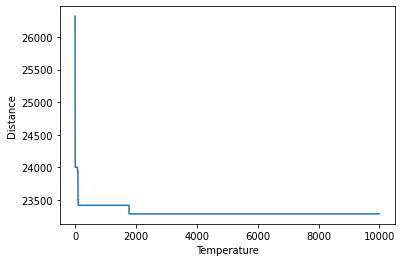

In [121]:
pyplot.plot(distance_tab)


pyplot.xlabel('Temperature')
pyplot.ylabel('Distance')
pyplot.show()

Le graph obtenu represente le processus de l'algorithme. Celui nous montre les differents paliers, ainsi que l'evolution global de la distance du chemin optimale en fonction d'un parametre de l'algorithme : la temperature.
On remarque ainsi qu'au fur et à mesure de l'algorithme, la distance du chemin optimale diminue en fonction de la temperature.

Essayons de voir et observé le resultat obtenu en mettant notre algorithme dans du multistart.

Le principe du multistart est de générer des solutions initiales aléatoires, et de les utiliser pour trouver une solution optimale. Dans une representation graphique, le multi start va donc generer plusieurs point de depart de l'algorithme, et de trouver plusisieurs solutions locales, et donc la meilleure solution globale en les comparant.

IntProgress(value=0, layout=Layout(width='100%'), max=50)

23150.010012763552


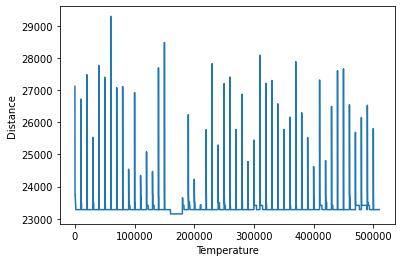

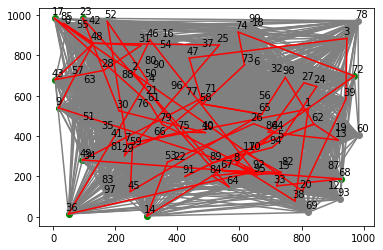

In [111]:
# Make a multistart of recuit_simule_matrix
distance_tab_multi=[]
nb_start = 50
bar = IntProgress(min=0, max=nb_start, layout={"width" : "100%"})
display(bar)

for _ in range (nb_start):  

    path = generate_random_path(len(vertices_list), start_vertex_index)
    solution_courante, distance_courante, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path,T0)
    solution_mult = solution_courante
    if distance_courante < distance:
        solution_mult = solution_courante
        distance = distance_courante
        i_tab = i_tab
        T_tab = T_tab
        distance_tab_multi += distance_tab
        distance_bornes = bone_inf-distance
        bornes.append(int(distance_bornes))
    distance_tab_multi += distance_tab
    
    bar.value += 1
bar.close()
print(distance)

pyplot.plot(distance_tab_multi)

pyplot.xlabel('Temperature')
pyplot.ylabel('Distance')
pyplot.show()
complete_path = get_complete_path(solution_mult, all_paths)
plot_graph(complete_path, graph, all_vertex, vertices_list, start_vertex)

Ici, le multi start est de 10 iterations, et on a donc 10 solutions locales. L'instance reste la meme, et on remarque une distance optimale qui a baissé par rapport à la premiere ( ici 23150 au lieu de 23283) ce qui, à plus grande echelle, peut etre interessant.

Le resultat reste tres loin de notre borne inférieure, ce qui ne nous permet pas d'elire cet algorithme comme le plus efficace possible.

## Algorithme génétique

In [ ]:
def algo_genetique():
    pass

### Statistiques de l'algorithme genetique

Pour se faire une idée plus exacte des performances de l'algorithme, il faudrait tester un grand nombre d'instances, en calculant à chaque fois la distance à la borne inférieure de l'instance considérée. On évaluera ensuite de manière statistique ces distances (le choix exact des statistiques à calculer est abordé plus loin).

In [ ]:
import statistics

nb_vertex_matrix = 100
min_weight = 10
max_weight = 60
density = 0.5
nb_vertex_chosen = 30

population_min = 200
population_max = 500
nb_test = 10

bornes_tab = []

moyennes   = []
deviations = []

for po in range (population_min, population_max,25):
    for _ in range (nb_test):

        vertices_list = get_random_vertices_list(nb_vertex_matrix, nb_vertex_chosen)
        start_vertex = get_random_vertex(vertices_list)
        start_vertex_index = np.where(vertices_list == start_vertex)[0][0]

        interval_vertex = get_random_vertex(vertices_list)
        interval_vertex_index = np.where(vertices_list == interval_vertex)[0][0]

        interval = (0,100000000)

        # generation of the graph, the complete graph and the list of all paths
        graph, complete_graph, all_paths, all_vertex =\
        generate_instance(
        nb_vertex_matrix = nb_vertex_matrix,
        vertices_list = vertices_list,
        density = density
        )

        population = generate_population(po, complete_graph, interval, interval_vertex_index, start_vertex_index)
        best_path, best_weight, all_best_weights = evolve(population, complete_graph, interval, interval_vertex_index)
        borne_inf = Simplex(complete_graph)[1]
        distance_borne = borne_inf*100/best_weight
        bornes_tab.append(distance_borne)

        moyennes.append(statistics.fmean(bornes_tab))             
        deviations.append(np.std(bornes_tab))

        print("distance",distance_borne)
        print("borne_inf",borne_inf)
        print("best_weight",best_weight)

Le concept de la generation de statistiques est simple : Grace à celle-ci, on peut obtenir des informations sur le réel impact des parametres mis en place sur la méthode, et quels sont les resultats obtenus durant le processus. Pour voir ça, l'idée est de changer les parametres de population, de 200 à 500 avec des pas de 25. POur chaque itérations, 10 tests sont effectués, en generant une nouvelle instance à chaque fois, et en calculant ainsi la distance optimal pour la comparer à notre borne inferieur.
Ici, nous allons generer à chaque fois une matrice de 30 par 30, complete, avec la contrainte d'intervalle de temps de livraison vers un sommet particulier. 

In [ ]:
plt.hist(bornes_tab,bins=20, edgecolor = "black")                     
plt.xlabel("Rapprochement de la distance à la borne en %")                          
plt.ylabel("nombre d'intances")                               
plt.title("Distribution des distances à la borne supérieure") 

![image info](../Livrables/img/distrib_distance.png)

Ainsi, On remarque que pour une population allant de 300 à 500, le rapprochement pour une matrice de 30 par 30 est de 72,5% en moyenne par rapport à la borne. Ce qui prouve concretement que cet algorithme est efficace.

In [ ]:
plt.plot(moyennes)
plt.xlabel("Rapprochement de la distance à la borne en %")                             
plt.ylabel("nombre d'intances")                               
plt.title("Distribution des distances à la borne supérieure")

![image info](../Livrables/img/moyenne_evo.png)

Pour ce qui est du changement de parametres on remarque qu'à partir de la 50eme iterations, soit le moment où la population est de 325, la distance est la borne devient stable, ainsi, le parametre devient adapté pour la resolution de l'instance.